<a href="https://colab.research.google.com/github/DGuilherme/MEIA_AAUTIA/blob/master/PL6M1_DECISION_TREES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


# Algumas notas
pode ser o problema das decision trees?
- A profundidade da decision tree pode chegar a um ponto em que as folhas sao as amostras. Assim, permite memorizar os dados de treino e temos um overfitting e memoriza 
ruido.
- arvore de decisao com poucos niveis
underfiting tem poucos valores... poucos dados para conseguir obter conclusoes




In [ ]:
# Load the data
current_dir = os.getcwd() # get the current work directory
file_name = "data.csv"
file_path = current_dir + "\\" + file_name # path to the file
cancer_data = pd.read_csv(file_path) # read a cvs file
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


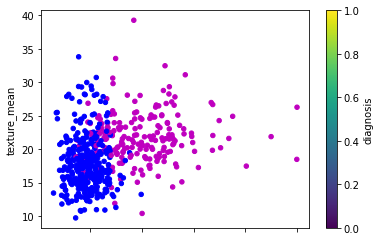

In [ ]:
# Plot the distribution of the two classes MAlign and benign 
cancer_data.plot.scatter(x = "area_mean", y = "texture_mean", c = "diagnosis", colormap='jet')
# the dataset is not linearly separable

In [ ]:
# another alternative is to use the sklearn

from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(cancer_data, test_size=0.33, random_state=42)

In [ ]:
X_train = data_train[["area_mean", "texture_mean"]].to_numpy()
Y_train = data_train["diagnosis"] 
X_test = data_test[["area_mean", "texture_mean"] ].to_numpy()
Y_test = data_test["diagnosis"]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)
Y_test_encoded = encoder.fit_transform(Y_test)

In [ ]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scalerTraining = MinMaxScaler()
scalerTesting = MinMaxScaler()
scalerTraining.fit(X_train)
scalerTesting.fit(X_test)
X_train_norm = scalerTraining.transform(X_train)
X_test_norm = scalerTesting.transform(X_test) 

In [ ]:
# criar classificador
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
# fase de treino
decision_tree.fit(X_train_norm, Y_train_encoded)


In [ ]:
def plotDecisionTree(X,Y,clf,xlabel,ylabel):
  plt.figure(figsize=(20,10))

  x_min, x_max = X[:,0].min() - 0.01 , X[:,0].max() + 0.1





  

In [ ]:
plotDecisionTree(X_train_norm, Y_train_encoded, decision_tree, "area_media" , "textura_media")


# Overfiting

Uma forma de evitar é arranjar uma arvore com o melhor gini para uma determinada profundidade 

`max_depth`= 5

Tentar perceber a profundidade p

Também é possivel retornar as feature importance 


In [ ]:
# funçao para criar a arvore
from sklearn.tree import plot_tree

plt.figure(figsize=(20,30))
plot_tree(decision_tree)
plt.show()

# Decision Tree - Regression